In [352]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import mpld3
mpld3.enable_notebook()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARMA
register_matplotlib_converters()
from time import time
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from scipy.optimize import linprog

In [353]:
dfB = pd.read_csv('Data/dfB.csv', index_col=0)
dfG = pd.read_csv('Data/dfG.csv', index_col=0)

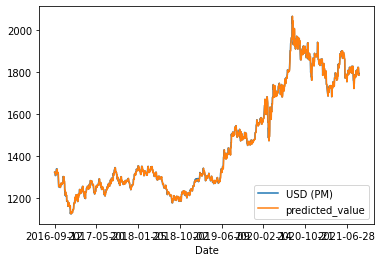

In [354]:
dfG[["USD (PM)","predicted_value"]].plot()
plt.legend(loc=4)
plt.savefig('GoldPrediction.png')

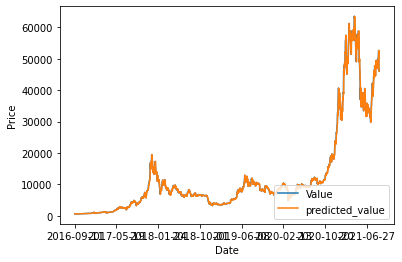

In [355]:
dfB[["Value","predicted_value"]].plot()
plt.legend(loc=4)
plt.xlabel("Date")
plt.ylabel("Price")
plt.savefig('BitcoinPrediction.png')

In [356]:
ind = 3
x=500/(dfG["USD (PM)"][ind])
y=500/(dfB["Value"][ind])
alpha =0.01
beta = 0.02
portfolio = pd.DataFrame()
for ind in range(0, 1820):
    A = np.array([[dfG['predicted_value'][ind+1]+alpha, dfB['predicted_value'][ind+1]+beta], 
              [dfG['predicted_value'][ind+1], 0], 
             [dfB['predicted_value'][ind+1], 0]])
    b = np.array([dfG["USD (PM)"][ind]*x + dfB["Value"][ind]*y, (dfG["USD (PM)"][ind])*x, (dfB["Value"][ind])*y])
    c = np.array([alpha-dfG['predicted_value'][ind+1], beta-dfB['predicted_value'][ind+1] ])
    res = linprog(c, A_ub = A, b_ub = b)
    x = res.x[0]
    y = res.x[1]
    z = round(res.fun, ndigits=2)
    portfolios= pd.DataFrame({"Portfolio":[dfG["USD (PM)"][ind+1]*x + dfB["Value"][ind+1]*y],
                              "PortfolioG":[dfG["USD (PM)"][ind+1]*x],"PortfolioB":[dfB["Value"][ind+1]*y]})
    portfolio = portfolio.append(portfolios)


In [357]:
portfolio1 = portfolio.reset_index()
portfolio2 =portfolio1.drop(['index'], axis=1)
portfolio = portfolio2
portfolio

,Portfolio,PortfolioG,PortfolioB
0,1015.780175,505.263966,510.516209
1,1015.759642,505.263971,510.495671
2,1006.033526,500.434933,505.598593
3,999.291297,496.539333,502.751964
4,995.499072,495.442074,500.056998
...,...,...,...
1815,280215.029443,0.000000,280215.029443
1816,290533.474386,0.000000,290533.474386
1817,293470.027813,0.000000,293470.027813
1818,297834.933056,0.000000,297834.933056


In [358]:
#portfolio.to_csv('Data/portfolio2.csv')

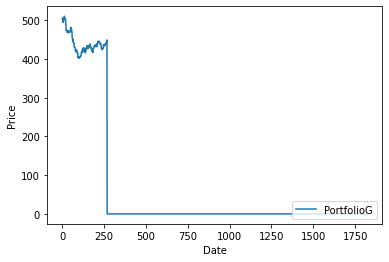

In [359]:
portfolio[["PortfolioG"]].plot()
plt.legend(loc=4)
plt.xlabel("Date")
plt.ylabel("Price")
plt.savefig('Goldat35.png')

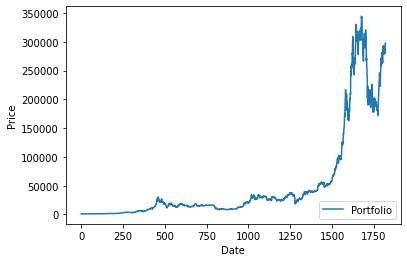

In [360]:
portfolio[["Portfolio"]].plot()
plt.legend(loc=4)
plt.xlabel("Date")
plt.ylabel("Price")
plt.savefig('Portfolio.png')